In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [3]:
input_names = ["Band 1_11", "Band 1_12", "Band 1_13", "Band 1_14", "Band 1_15", 
               "Band 1_21", "Band 1_22", "Band 1_23", "Band 1_24", "Band 1_25", 
               "Band 1_31", "Band 1_32", "Band 1_33", "Band 1_34", "Band 1_35",
               "Band 1_41", "Band 1_42", "Band 1_43", "Band 1_44", "Band 1_45",
               "Band 1_51", "Band 1_52", "Band 1_53", "Band 1_54", "Band 1_55",
               
               
               "Band 2_11", "Band 2_12", "Band 2_13", "Band 2_14", "Band 2_15", 
               "Band 2_21", "Band 2_22", "Band 2_23", "Band 2_24", "Band 2_25", 
               "Band 2_31", "Band 2_32", "Band 2_33", "Band 2_34", "Band 2_35",
               "Band 2_41", "Band 2_42", "Band 2_43", "Band 2_44", "Band 2_45",
               "Band 2_51", "Band 2_52", "Band 2_53", "Band 2_54", "Band 2_55",
               
               
               "Band 3_11", "Band 3_12", "Band 3_13", "Band 3_14", "Band 3_15", 
               "Band 3_21", "Band 3_22", "Band 3_23", "Band 3_24", "Band 3_25", 
               "Band 3_31", "Band 3_32", "Band 3_33", "Band 3_34", "Band 3_35",
               "Band 3_41", "Band 3_42", "Band 3_43", "Band 3_44", "Band 3_45",
               "Band 3_51", "Band 3_52", "Band 3_53", "Band 3_54", "Band 3_55",
               
               
               "Band 4_11", "Band 4_12", "Band 4_13", "Band 4_14", "Band 4_15", 
               "Band 4_21", "Band 4_22", "Band 4_23", "Band 4_24", "Band 4_25", 
               "Band 4_31", "Band 4_32", "Band 4_33", "Band 4_34", "Band 4_35",
               "Band 4_41", "Band 4_42", "Band 4_43", "Band 4_44", "Band 4_45",
               "Band 4_51", "Band 4_52", "Band 4_53", "Band 4_54", "Band 4_55",
               
               "Band 5_11", "Band 5_12", "Band 5_13", "Band 5_14", "Band 5_15", 
               "Band 5_21", "Band 5_22", "Band 5_23", "Band 5_24", "Band 5_25", 
               "Band 5_31", "Band 5_32", "Band 5_33", "Band 5_34", "Band 5_35",
               "Band 5_41", "Band 5_42", "Band 5_43", "Band 5_44", "Band 5_45",
               "Band 5_51", "Band 5_52", "Band 5_53", "Band 5_54", "Band 5_55",
               
               
               "MRH 5_11", "MRH 5_12", "MRH 5_13", "MRH 5_14", "MRH 5_15", 
               "MRH 5_21", "MRH 5_22", "MRH 5_23", "MRH 5_24", "MRH 5_25", 
               "MRH 5_31", "MRH 5_32", "MRH 5_33", "MRH 5_34", "MRH 5_35",
               "MRH 5_41", "MRH 5_42", "MRH 5_43", "MRH 5_44", "MRH 5_45",
               "MRH 5_51", "MRH 5_52", "MRH 5_53", "MRH 5_54", "MRH 5_55",
               
               
               "MSH 5_11", "MSH 5_12", "MSH 5_13", "MSH 5_14", "MSH 5_15", 
               "MSH 5_21", "MSH 5_22", "MSH 5_23", "MSH 5_24", "MSH 5_25", 
               "MSH 5_31", "MSH 5_32", "MSH 5_33", "MSH 5_34", "MSH 5_35",
               "MSH 5_41", "MSH 5_42", "MSH 5_43", "MSH 5_44", "MSH 5_45",
               "MSH 5_51", "MSH 5_52", "MSH 5_53", "MSH 5_54", "MSH 5_55",
               
               "MTE 5_11", "MTE 5_12", "MTE 5_13", "MTE 5_14", "MTE 5_15", 
               "MTE 5_21", "MTE 5_22", "MTE 5_23", "MTE 5_24", "MTE 5_25", 
               "MTE 5_31", "MTE 5_32", "MTE 5_33", "MTE 5_34", "MTE 5_35",
               "MTE 5_41", "MTE 5_42", "MTE 5_43", "MTE 5_44", "MTE 5_45",
               "MTE 5_51", "MTE 5_52", "MTE 5_53", "MTE 5_54", "MTE 5_55",
            
               
               "MVI 5_11", "MVI 5_12", "MVI 5_13", "MVI 5_14", "MVI 5_15", 
               "MVI 5_21", "MVI 5_22", "MVI 5_23", "MVI 5_24", "MVI 5_25", 
               "MVI 5_31", "MVI 5_32", "MVI 5_33", "MVI 5_34", "MVI 5_35",
               "MVI 5_41", "MVI 5_42", "MVI 5_43", "MVI 5_44", "MVI 5_45",
               "MVI 5_51", "MVI 5_52", "MVI 5_53", "MVI 5_54", "MVI 5_55"]

X_names = np.asarray(input_names)

In [4]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files_all = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files_all

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [5]:
# Test Train Split for Files
import random
import math
SEED = 42
random.seed(SEED)
random.shuffle(Sa1_files_all)

Sa1_files_all.sort()

size_Sa1 = len(Sa1_files_all)

Sa1_files_train_size = math.ceil(size_Sa1*.75)
Sa1_files_test_size = size_Sa1 - Sa1_files_train_size

Sa1_files_train = Sa1_files_all[:Sa1_files_train_size]
Sa1_files_test = Sa1_files_all[Sa1_files_train_size:]

In [6]:
np.size(Sa1_files_train)

262

In [7]:
np.size(Sa1_files_test)

87

In [8]:
Sa1_files_train

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012418.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012419.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012420.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020716.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [9]:
Sa1_files_test

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081818.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081819.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [27]:
X_train = []
y_train = []

# Extracting training images only
for filename in Sa1_files_train:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File)
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File)
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File)
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File)
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File)
    
    
    # Model Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.flipud(np.load(MRH_File))
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.flipud(np.load(MSH_File))
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.flipud(np.load(MTE_File))
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.flipud(np.load(MVI_File))
    
    # Radar Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.flipud(np.load(Radar_File))
    
    rows = len(Sa1arr);
    cols = len(Sa1arr[0]);
    
    
    for row in range(2, rows-2):
        for col in range(2, cols-2):
            x = [];
            
            # Sa1
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(Sa1arr[row_][col_])
                    
            # Sa2
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(Sa2arr[row_][col_])
                    
                    
            # Sa3
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(Sa3arr[row_][col_])
                    
            # Sa4
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(Sa4arr[row_][col_])
                    
            # Sa6
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(Sa6arr[row_][col_])
                    
                    
                    
                    
            # MRH
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(MRHarr[row_][col_])    
                    
            # MSH
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(MSHarr[row_][col_])
                    
                    
            # MTE
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(MTEarr[row_][col_])
                    
                    
            # MVI
            for row_ in range(row-2, row+3):
                for col_ in range(row-2, row+3):
                    x.append(MVIarr[row_][col_])
                    
            # clip 0
            x = np.array(x)
            x[x < 0] = 0
            x = x.tolist()
                    
                    
            y_train.append(Radararr[row][col])        
            X_train.append(x)

2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
2
21
2
22
2
23
2
24
2
25
2
26
2
27
2
28
2
29
2
30
2
31
2
32
2
33
2
34
2
35
2
36
2
37
2
38
2
39
2
40
2
41
2
42
2
43
2
44
2
45
2
46
2
47
2
48
2
49
2
50
2
51
2
52
2
53
2
54
2
55
2
56
2
57
2
58
2
59
2
60
2
61
2
62
2
63
2
64
2
65
2
66
2
67
2
68
2
69
2
70
2
71
2
72
2
73
2
74
2
75
2
76
2
77
2
78
2
79
2
80
2
81
2
82
2
83
2
84
2
85
2
86
2
87
2
88
2
89
2
90
2
91
2
92
2
93
2
94
2
95
2
96
2
97
2
98
2
99
2
100
2
101
2
102
2
103
2
104
2
105
2
106
2
107
2
108
2
109
2
110
2
111
2
112
2
113
2
114
2
115
2
116
2
117
2
118
2
119
2
120
2
121
2
122
2
123
2
124
2
125
2
126
2
127
2
128
2
129
2
130
2
131
2
132
2
133
2
134
2
135
2
136
2
137
2
138
2
139
2
140
2
141
2
142
2
143
2
144
2
145
2
146
2
147
2
148
2
149
2
150
2
151
2
152
2
153
2
154
2
155
2
156
2
157
2
158
2
159
2
160
2
161
2
162
2
163
2
164
2
165
2
166
2
167
2
168
2
169
2
170
2
171
2
172
2
173
2
174
2
175
2
176
2
177
2
178
2
179
2
180
2
181
2
182
2
183
2
184
2
185
2


In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
print(X_train.shape)
print(np.std(X_train))
print(np.min(X_train))
print(np.mean(X_train))
print(np.max(X_train))

(63504, 225)
6826.465245229975
0.0036476647946983576
6574.911760893213
27223.275390625


In [30]:
print(y_train.shape)
print(np.std(y_train))
print(np.min(y_train))
print(np.mean(y_train))
print(np.max(y_train))

(63504,)
31.733963810354425
0
45.1665091962711
526


In [31]:
# Train the Training set

In [33]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
rf_train.feature_importances_.shape

(225,)

In [35]:
max_heat = np.max(rf_train.feature_importances_)
max_heat

0.1783411975525157

In [37]:
import seaborn as sns
feature_heatmap = rf_train.feature_importances_.reshape((45,5))

Text(0.5, 1.0, 'Band 1')

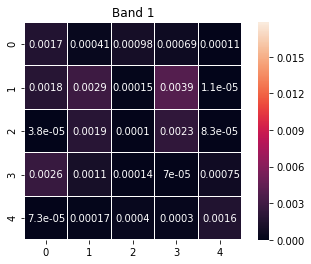

In [42]:
sns.heatmap(feature_heatmap[0:5], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('Band 1')

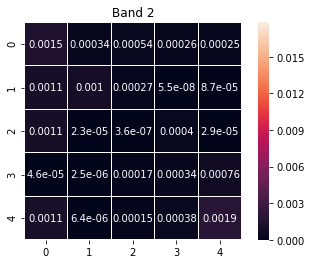

In [43]:
g2 = sns.heatmap(feature_heatmap[5:10], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('Band 2')

Text(0.5, 1.0, 'Band 3')

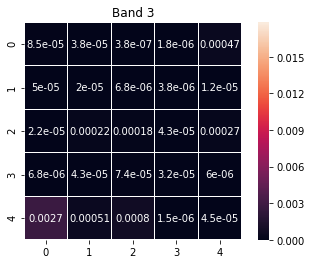

In [44]:
sns.heatmap(feature_heatmap[10:15], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('Band 3')

Text(0.5, 1.0, 'Band 4')

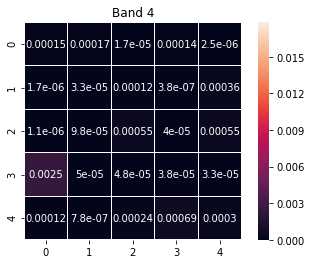

In [46]:
sns.heatmap(feature_heatmap[15:20], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('Band 4')

Text(0.5, 1.0, 'Band 6')

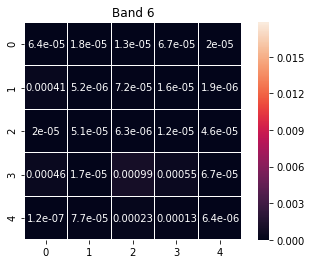

In [47]:
sns.heatmap(feature_heatmap[20:25], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('Band 6')

Text(0.5, 1.0, 'MRH')

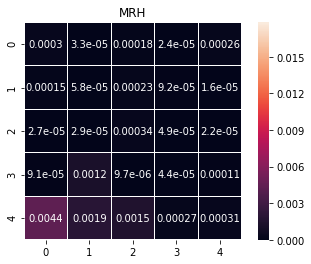

In [48]:
sns.heatmap(feature_heatmap[25:30], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat/10).set_title('MRH')

Text(0.5, 1.0, 'MSH')

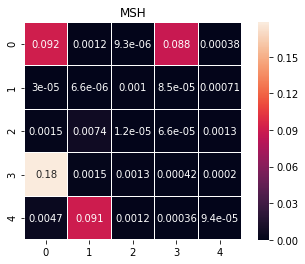

In [49]:
sns.heatmap(feature_heatmap[30:35], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('MSH')

Text(0.5, 1.0, 'MTE')

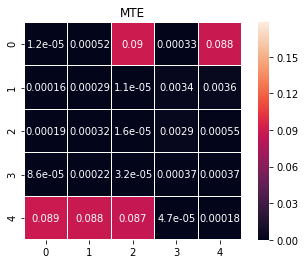

In [50]:
sns.heatmap(feature_heatmap[35:40], linewidths=.01, annot=True, square="true", vmin=0, vmax=max_heat).set_title('MTE')

Text(0.5, 1.0, 'MVI')

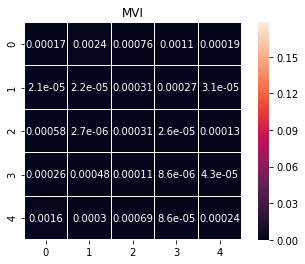

In [51]:
sns.heatmap(feature_heatmap[40:45], linewidths=.01, annot=True, square=True, vmin=0, vmax=max_heat).set_title('MVI')

In [52]:
# Evaluate the Trained output

In [53]:
predictions_train = rf_train.predict(X_train)

In [54]:
errors_train = abs(predictions_train - y_train)
np.max(errors_train)

462.20599927942555

(array([1.66900657e-02, 1.52949858e-03, 4.85284242e-04, 1.36514259e-04,
        8.05314380e-05, 4.70016200e-05, 2.36504967e-05, 1.13761883e-05,
        6.28684089e-06, 1.19749350e-06]),
 array([  0. ,  52.6, 105.2, 157.8, 210.4, 263. , 315.6, 368.2, 420.8,
        473.4, 526. ]),
 <a list of 10 Patch objects>)

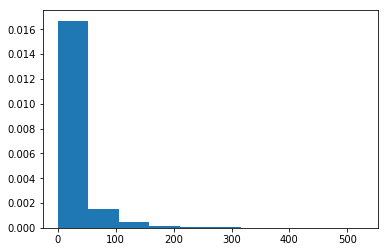

In [55]:
plt.hist(y_train, density=1)

(array([2.06552345e-02, 5.79519916e-04, 1.73072379e-04, 9.84604678e-05,
        5.45109856e-05, 3.95204646e-05, 1.83974576e-05, 1.05615035e-05,
        4.76971124e-06, 1.36277464e-06]),
 array([7.57431693e-04, 4.62212816e+01, 9.24418058e+01, 1.38662330e+02,
        1.84882854e+02, 2.31103378e+02, 2.77323903e+02, 3.23544427e+02,
        3.69764951e+02, 4.15985475e+02, 4.62205999e+02]),
 <a list of 10 Patch objects>)

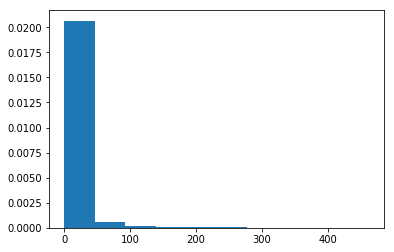

In [56]:
plt.hist(errors_train, density=1)

In [57]:
# Confusion Matrix

In [58]:
y_train_no_zero = list(filter(lambda a: a != 0, y_train))
print(np.shape(y_train_no_zero))
print(np.std(y_train_no_zero))
print(np.min(y_train_no_zero))
print(np.mean(y_train_no_zero))
print(np.max(y_train_no_zero))

(63503,)
31.733707507155188
3
45.16722044627813
526


In [59]:
thershold = np.mean(y_train_no_zero) + 1 * np.std(y_train_no_zero)
thershold

76.90092795343332

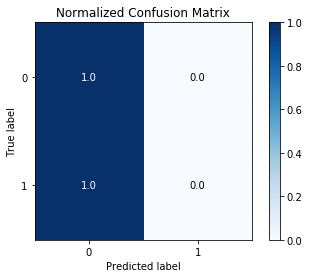

In [60]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
FPR = []
TPR = []

for i in range(1, 531, 10):
    y_train_copy = np.copy(y_train)
    y_train_copy[y_train_copy < i] = 0
    y_train_copy[y_train_copy >= i] = 1

    predictions_train_copy = np.copy(predictions_train)
    predictions_train_copy[predictions_train_copy < i] = 0
    predictions_train_copy[predictions_train_copy >= i] = 1
    
    temp = confusion_matrix(y_train_copy, predictions_train_copy)
    
    TN = temp[0][0]
    FP = temp[0][1]
    FN = temp[1][0]
    TP = temp[1][1]
    
    TPR_ = TP/(TP+FN)
    FPR_ = FP/(TN+FP)
    
    FPR.append(FPR_)
    TPR.append(TPR_)

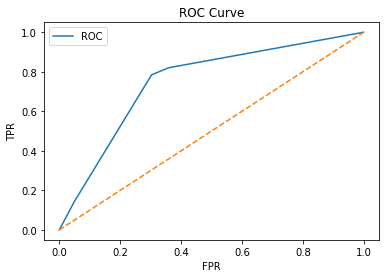

In [62]:
plt.plot(FPR, TPR, label='ROC')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");
plt.legend()

In [63]:
# Save the Model
import pickle
filename = 'MODEL_OUT_Final_Random_Forest_5x5_npy_SA_MOD.sav'
pickle.dump(rf_train, open(filename, 'wb'))